# Introduction to Machine Learning and Toolkit Exercises

# What is Machine Learning?

| This | is   |
|------|------|
|   Machine learning allows computers to learn and infer from data.  | ![robot.png](Assets/robot.png)|



# Learning Objectives

- Demonstrate supervised learning algorithms
- Explain key concepts like under- and over-fitting, regularization, and cross-validation
- Classify the type of problem to be solved, choose the right algorithm, tune parameters, and validate a model
- Apply Intel® Extension for Scikit-learn* to leverage underlying compute capabilities of hardware

# Overview of Course:

### Topics include:

- Introduction and exploratory analysis (Week 1)
- Supervised machine learning (Weeks 2 – 10)
- Unsupervised machine learning (Weeks 11 – 12)

### Prerequisites:

- Python* programming
- Calculus
- Linear algebra
- Statistics

### Lab Preparation:
- pip install -r ../requirements.txt

### Our Toolset: Intel® oneAPI AI Analytics Toolkit (AI Kit)
- Intel® Extension for Scikit-learn*

### Intel® oneAPI Toolkits Installation
The [following documents](https://software.intel.com/content/www/us/en/develop/articles/installation-guide-for-intel-oneapi-toolkits.html) provide detailed instructions on how to get and install Intel® oneAPI packages using different installer modes and package managers:

- [Intel® oneAPI Toolkits Installation Guide for Linux* OS](https://software.intel.com/content/www/us/en/develop/documentation/installation-guide-for-intel-oneapi-toolkits-linux/top.html)
- [Intel® oneAPI Toolkits Installation Guide for Windows*](https://software.intel.com/content/www/us/en/develop/documentation/installation-guide-for-intel-oneapi-toolkits-windows/top.html)
- [Intel® oneAPI Toolkits Installation Guide for macOS*](https://software.intel.com/content/www/us/en/develop/documentation/installation-guide-for-intel-oneapi-toolkits-macos/top.html)



## Introduction

We will be using the iris data set for this tutorial. This is a well-known data set containing iris species and sepal and petal measurements. The data we will use are in a file called `Iris_Data.csv` found in the [data](../../data) directory.

In [ ]:
from __future__ import print_function
import os
data_path = [ '../data']



# scikit-learn*

Frameworks provide structure that Data Scientists use to build code. Frameworks are more than just libraries, because in addition to callable code, frameworks influence how code is written.

A main virtue of using an optimized framework is that code runs faster. Code that runs faster is just generally more convenient but when we begin looking at applied data science and AI models, we can see more material benefits. Here you will see how optimization, particularly hyperparameter optimization can benefit more than just speed.

These exercises will demonstrate how to apply **the Intel® Extension for Scikit-learn*,** a seamless way to speed up your Scikit-learn application. The acceleration is achieved through the use of the Intel® oneAPI Data Analytics Library (oneDAL). Patching is the term used to extend scikit-learn with Intel optimizations and makes it a well-suited machine learning framework for dealing with real-life problems.

To get optimized versions of many Scikit-learn algorithms using a patch() approach consisting of adding these lines of code Prior to importing sklearn:

- **from sklearnex import patch_sklearn**
- **patch_sklearn()**


In [ ]:
import pandas as pd

## Question 1

Load the data from the file (data/Iris_Data.csv) using the techniques learned today. Examine it.

Determine the following:

* The number of data points (rows). (*Hint:* check out the dataframe `.shape` attribute.)
* The column names. (*Hint:* check out the dataframe `.columns` attribute.)
* The data types for each column. (*Hint:* check out the dataframe `.dtypes` attribute.)

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/MLE/Datasets/Iris_Data.csv')
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [ ]:
df.shape

(150, 5)

In [ ]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [ ]:
df.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

## Question 2

Examine the species names and note that they all begin with 'Iris-'. Remove this portion of the name so the species name is shorter.

*Hint:* there are multiple ways to do this, but you could use either the [string processing methods](http://pandas.pydata.org/pandas-docs/stable/text.html) or the [apply method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.apply.html).

In [ ]:
df['species'] = df['species'].str.removeprefix("Iris")
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,-setosa
1,4.9,3.0,1.4,0.2,-setosa
2,4.7,3.2,1.3,0.2,-setosa
3,4.6,3.1,1.5,0.2,-setosa
4,5.0,3.6,1.4,0.2,-setosa
5,5.4,3.9,1.7,0.4,-setosa
6,4.6,3.4,1.4,0.3,-setosa
7,5.0,3.4,1.5,0.2,-setosa
8,4.4,2.9,1.4,0.2,-setosa
9,4.9,3.1,1.5,0.1,-setosa


## Question 3

Determine the following:  
* The number of each species present. (*Hint:* check out the series `.value_counts` method.)
* The mean, median, and quantiles and ranges (max-min) for each petal and sepal measurement.

*Hint:* for the last question, the `.describe` method does have median, but it's not called median. It's the *50%* quantile. `.describe` does not have range though, and in order to get the range, you will need to create a new entry in the `.describe` table, which is `max - min`.

In [ ]:
species_count = df['species'].value_counts()
print(species_count)

-setosa        50
-versicolor    50
-virginica     50
Name: species, dtype: int64


In [ ]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Question 4

Calculate the following **for each species** in a separate dataframe:

* The mean of each measurement (sepal_length, sepal_width, petal_length, and petal_width).
* The median of each of these measurements.

*Hint:* you may want to use Pandas [`groupby` method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.groupby.html) to group by species before calculating the statistic.

If you finish both of these, try calculating both statistics (mean and median) in a single table (i.e. with a single groupby call). See the section of the Pandas documentation on [applying multiple functions at once](http://pandas.pydata.org/pandas-docs/stable/groupby.html#applying-multiple-functions-at-once) for a hint.

In [ ]:
df.groupby(['species']).mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
-setosa,5.006,3.418,1.464,0.244
-versicolor,5.936,2.770,4.260,1.326
-virginica,6.588,2.974,5.552,2.026


## Question 5

Make a scatter plot of `sepal_length` vs `sepal_width` using Matplotlib. Label the axes and give the plot a title.

In [ ]:
import matplotlib.pyplot as plt


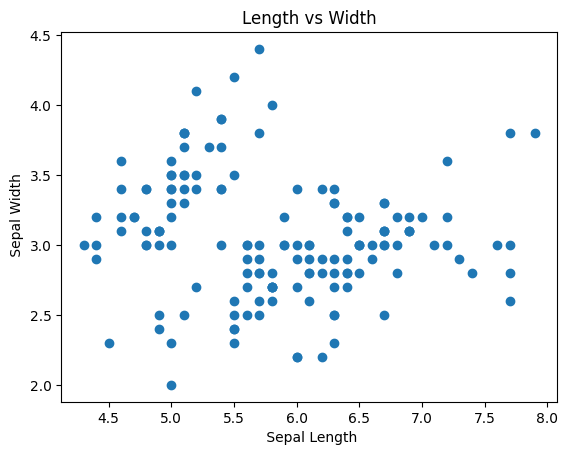

In [ ]:
plt.scatter(df['sepal_length'],df['sepal_width'])
plt.xlabel(" Sepal Length")
plt.ylabel(" Sepal Width")
plt.title("Length vs Width")
plt.show()

## Question 6

Make a histogram of any one of the four features. Label axes and title it as appropriate.

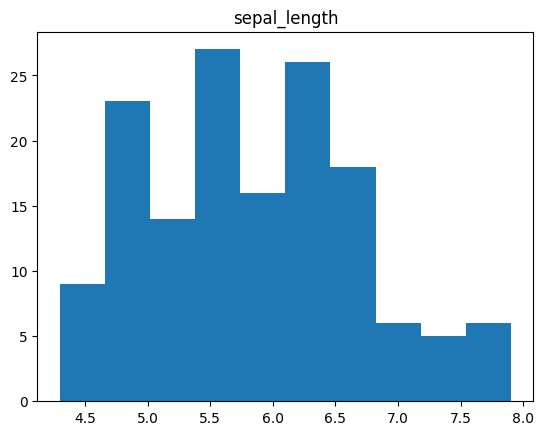

In [ ]:
plt.hist(df['sepal_length'])
plt.title("sepal_length")
plt.show()

## Question 7

Now create a single plot with histograms for each feature (`petal_width`, `petal_length`, `sepal_width`, `sepal_length`) overlayed. If you have time, next try to create four individual histogram plots in a single figure, where each plot contains one feature.

For some hints on how to do this with Pandas plotting methods, check out the [visualization guide](http://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html) for Pandas.

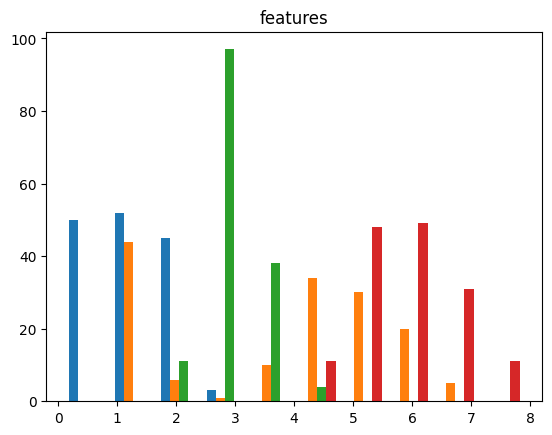

In [ ]:
fea = [df['petal_width'], df['petal_length'], df['sepal_width'], df['sepal_length']]
plt.hist(fea)
plt.title("features")
plt.show()

## Question 8

Using Pandas, make a boxplot of each petal and sepal measurement. Here is the documentation for [Pandas boxplot method](http://pandas.pydata.org/pandas-docs/version/0.18.1/visualization.html#visualization-box).

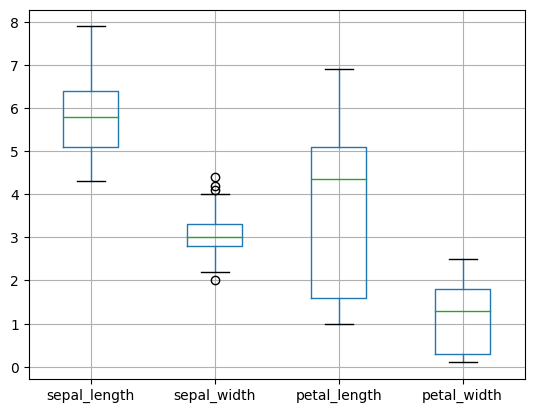

In [ ]:
df.boxplot()
plt.show()

## Question 9

Now make a single boxplot where the features are separated in the x-axis and species are colored with different hues.

*Hint:* you may want to check the documentation for [Seaborn boxplots](http://seaborn.pydata.org/generated/seaborn.boxplot.html).

Also note that Seaborn is very picky about data format--for this plot to work, the input dataframe will need to be manipulated so that each row contains a single data point (a species, a measurement type, and the measurement value). Check out Pandas [stack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.stack.html) method as a starting place.

Here is an example of a data format that will work:

|   | species | measurement  | size |
| - | ------- | ------------ | ---- |
| 0	| setosa  | sepal_length | 5.1  |
| 1	| setosa  | sepal_width  | 3.5  |

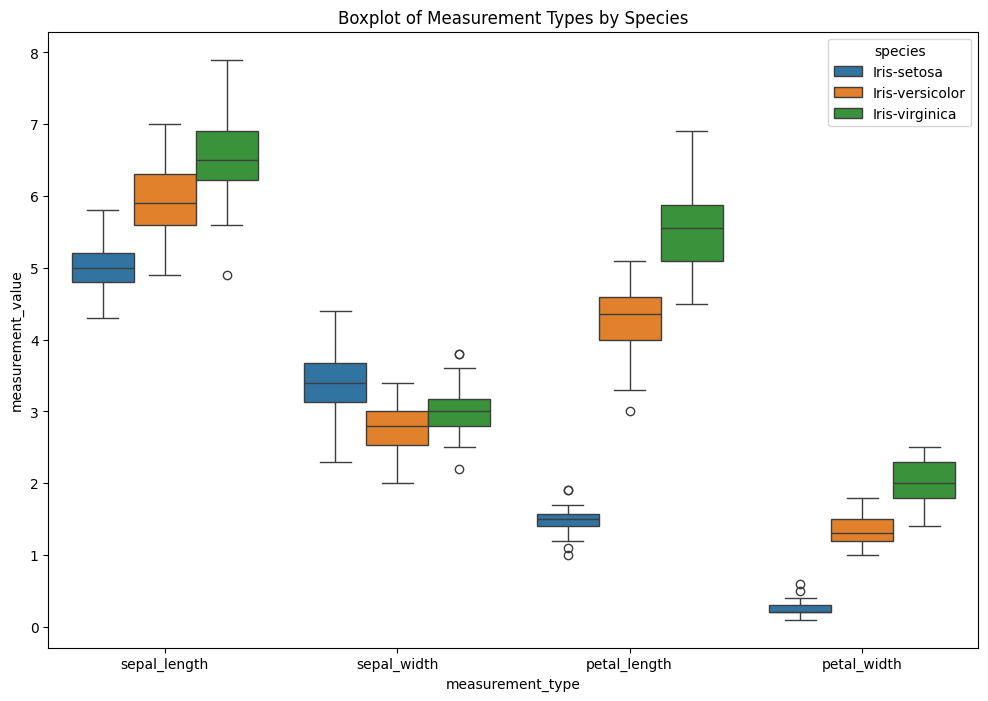

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv('/content/Iris_Data.csv')
df_melted = pd.melt(df, id_vars='species', var_name='measurement_type', value_name='measurement_value')
plt.figure(figsize=(12, 8))
sns.boxplot(x='measurement_type', y='measurement_value', hue='species', data=df_melted)
plt.title('Boxplot of Measurement Types by Species')
plt.show()



## Question 10

Make a [pairplot](http://seaborn.pydata.org/generated/seaborn.pairplot.html) with Seaborn to examine the correlation between each of the measurements.

*Hint:* this plot may look complicated, but it is actually only a single line of code. This is the power of Seaborn and dataframe-aware plotting! See the lecture notes for reference.

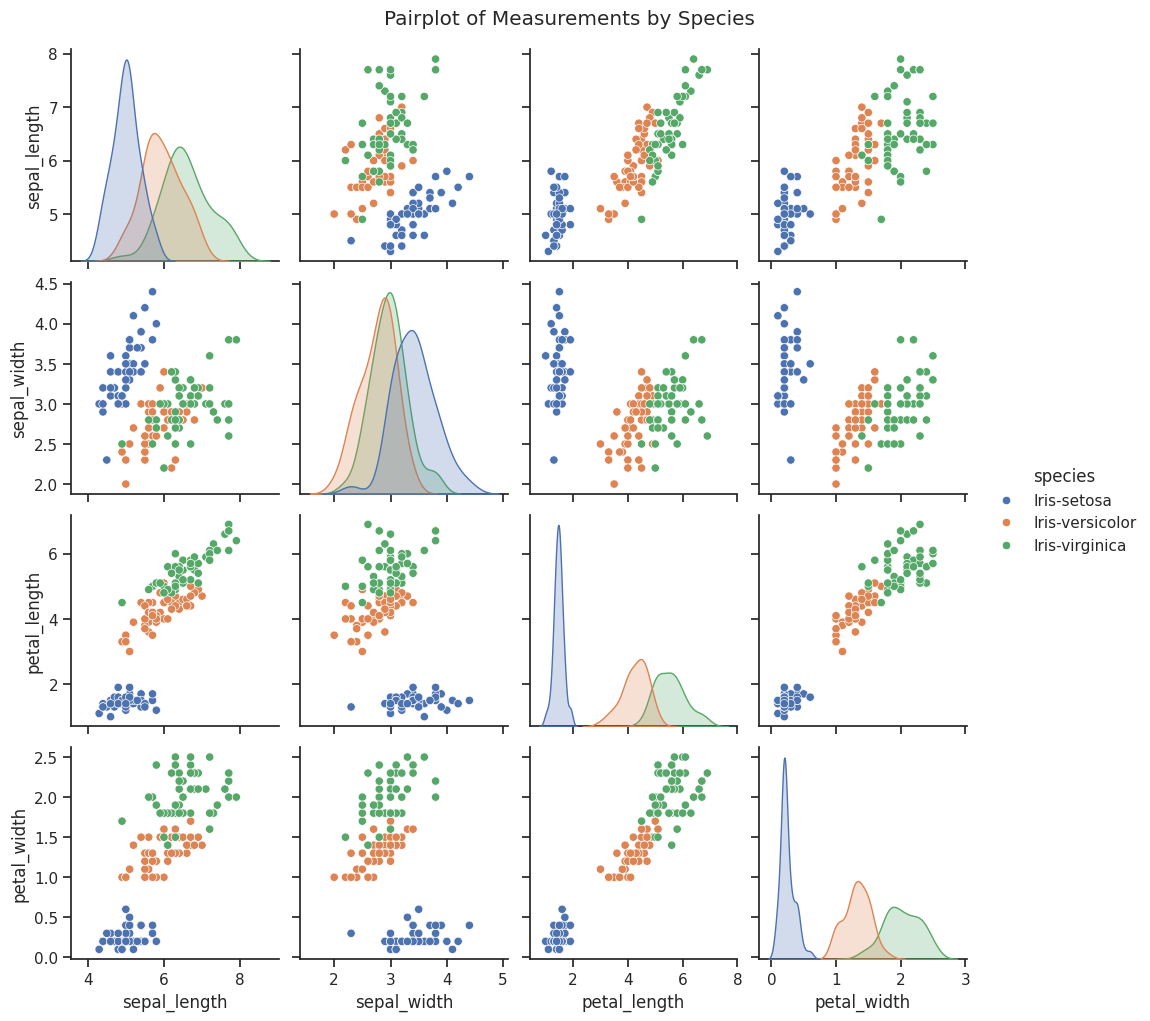

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="ticks")
sns.pairplot(df, hue="species")
plt.suptitle("Pairplot of Measurements by Species", y=1.02)
plt.show()
